# Frequency mixer Project

## Introduction

This python notebook implements a frequency based image fusion system to combine high-frequency features (fine details) from a cat image with low-frequency features (overall structure) from a dog image . The project uses the 2D Discrete Fourier Transform to analyze spatial frequencies, visualize magnitude spectra, study rotation effects, and fuse images using a frequency mixer. I explored multiple filtering approaches, with the Gaussian filter providing the best result due to its smooth frequency separation.

## Mathematical Info: 2D DFT (DISCREET FOURIER TRANSFORM)

The 2D DFT for an image $ I(x, y) $ of size $ M \times N $ is given by:

$$
F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} I(x, y) \cdot e^{-j2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

The inverse transform is:

$$
I(x, y) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u, v) \cdot e^{j2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

The magnitude spectrum is:

$$
S(u, v) = |F(u, v)|
$$

The dB spectrum is:

$$
S_{dB}(u, v) = 20 \log_{10} (|F(u, v)| + \epsilon)
$$

where $$ ( \epsilon ) $$ is a small constant to avoid log(0).

## Steps

1. **Load and Preprocess the Images**:
   - Load grayscale images using PIL.
   - Display the cat image.

2. **Compute 2D DFT and Magnitude Spectra**:
   - Apply `np.fft.fft2` to compute the 2D DFT of the cat image.
   - Shift the spectrum using `np.fft.fftshift` to center low frequencies.
   - Compute and display normal and dB magnitude spectra.

3. **Analyze Rotation Effects**:
   - Rotate the cat image $90^\circ$ counterclockwise using `np.rot90`.
   - Compute the 2D DFT and magnitude spectra of the rotated image.
   - Display spectra, observing a $90^\circ$ rotation in the frequency domain.

4. **Frequency Mixer**:
   - Fuse high frequencies (details) from the cat image with low frequencies (structure) from the dog image.
   - Tested square, circular, and bilateral filters for fusion, noting artifacts and inefficiencies, with the Gaussian filter as the final approach.
   - Display results.


## Reasoning

- **Square/Circular Filters**: Frequency domain approaches were good but introduced artifacts due to sharp cutoffs.
- **Bilateral Filter**: Preserved edges but computationally heavy and poor at frequency isolation.
- **Gaussian Filter**: Has smooth, artifact-free filtering, computationally efficient in the spatial domain, and easily tunable via $\sigma$.

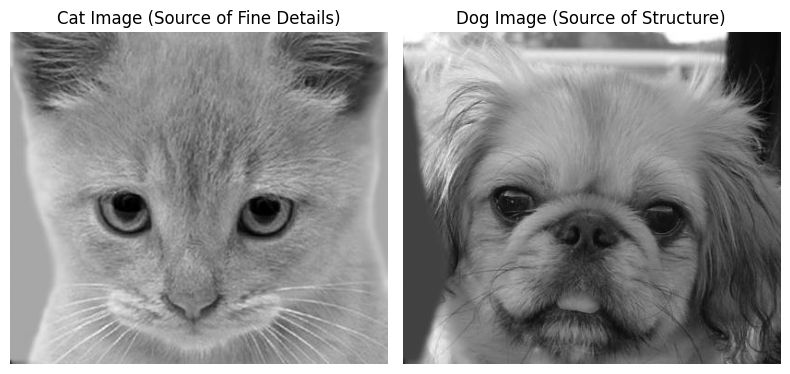

Cat image shape: (361, 410)
Dog image shape: (361, 410)


In [ ]:
#Importing the necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Loading images
cat_img = Image.open('cat_gray.jpg').convert('L')
dog_img = Image.open('dog_gray.jpg').convert('L')

# Converting to numpy arrays
cat_array = np.array(cat_img)
dog_array = np.array(dog_img)

#Plotting the original Cat and Dog images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(cat_array, cmap='gray')
axs[0].set_title('Cat Image')
axs[0].axis('off')

axs[1].imshow(dog_array, cmap='gray')
axs[1].set_title('Dog Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

#Printing the array shapes
print("Cat image shape:", cat_array.shape)
print("Dog image shape:", dog_array.shape)


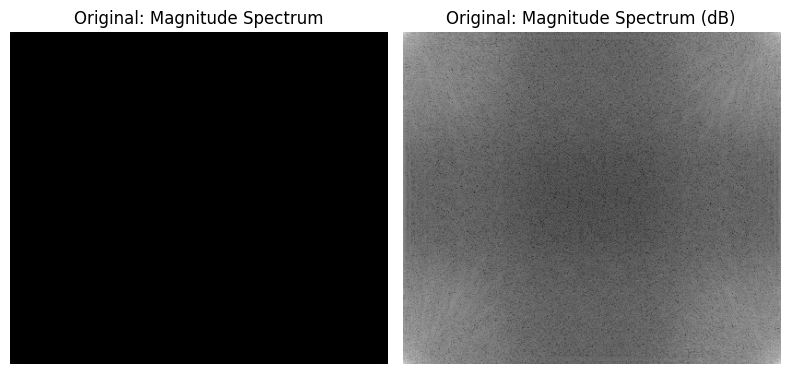

In [ ]:
# Computing the 2D FFT
f_transform = np.fft.fft2(cat_array)

# Magnitude spectrum (normal and dB)
magnitude_spectrum = np.abs(f_transform).astype(np.float64)
magnitude_spectrum_db = (20 * np.log10(magnitude_spectrum + 1e-10)).astype(np.float64)

#Plotting the Magnitude spectrum of the Cat image
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(magnitude_spectrum, cmap='gray')
axs[0].set_title('Original: Magnitude Spectrum')
axs[0].axis('off')

axs[1].imshow(magnitude_spectrum_db, cmap='gray')
axs[1].set_title('Original: Magnitude Spectrum (dB)')
axs[1].axis('off')

plt.tight_layout()
plt.show()



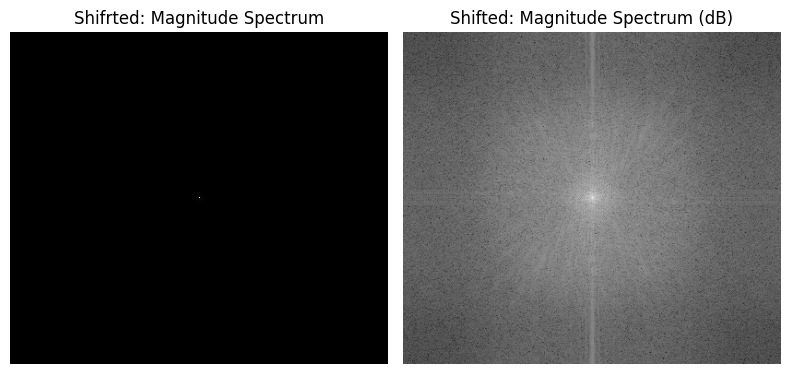

In [ ]:
#Shifting zero frequency to centre
f_transform_shifted = np.fft.fftshift(f_transform)

# Magnitude spectrum of shifted fft (normal and dB)
magnitude_spectrum_shifted = np.abs(f_transform_shifted).astype(np.float64)
magnitude_spectrum_db_shifted = (20 * np.log10(magnitude_spectrum_shifted + 1e-10)).astype(np.float64)

#Plotting the shifted Magnitude spectrum of the Cat image
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(magnitude_spectrum_shifted, cmap='gray')
axs[0].set_title('Shifrted: Magnitude Spectrum')
axs[0].axis('off')

axs[1].imshow(magnitude_spectrum_db_shifted, cmap='gray')
axs[1].set_title('Shifted: Magnitude Spectrum (dB)')
axs[1].axis('off')

plt.tight_layout()
plt.show()


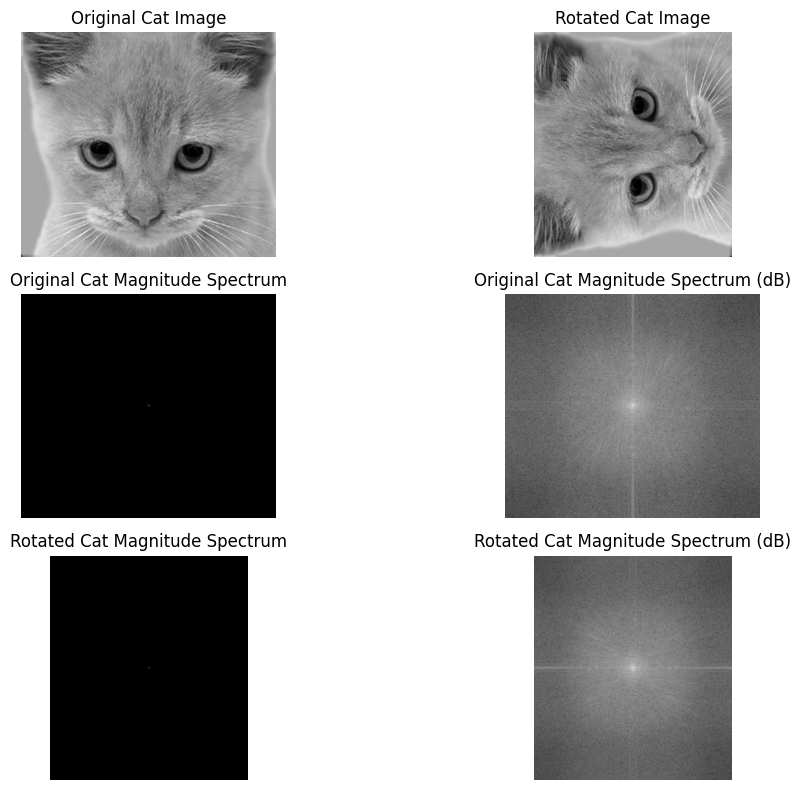

In [ ]:
# Rotate image 90 degrees anti-clockwise
cat_rot = np.rot90(cat_array, k=1)

# Computing 2D FFT
f_transform_rot = np.fft.fft2(cat_rot)

#Shifting zero frequency to centre
f_transform_shifted_rot = np.fft.fftshift(f_transform_rot)

# Magnitude spectrum of Rotated Cat (normal and dB)
magnitude_spectrum = np.abs(f_transform).astype(np.float64)
magnitude_spectrum_db = (20 * np.log10(magnitude_spectrum + 1e-10)).astype(np.float64)

# Magnitude spectrum of shifted fft (Rotated Cat) (normal and dB)
magnitude_spectrum_shifted_rot = np.abs(f_transform_shifted_rot).astype(np.float64)
magnitude_spectrum_db_shifted_rot = (20 * np.log10(magnitude_spectrum_shifted_rot + 1e-10)).astype(np.float64)

#Plotting the Cat images and the Magnituded spectrums for comparison
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

axs[0, 0].imshow(cat_img, cmap='gray')
axs[0, 0].set_title('Original Cat Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(cat_rot, cmap='gray')
axs[0, 1].set_title('Rotated Cat Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(magnitude_spectrum_shifted, cmap='gray')
axs[1, 0].set_title('Original Cat Magnitude Spectrum')
axs[1, 0].axis('off')

axs[1, 1].imshow(magnitude_spectrum_db_shifted, cmap='gray')
axs[1, 1].set_title('Original Cat Magnitude Spectrum (dB)')
axs[1, 1].axis('off')

axs[2, 0].imshow(magnitude_spectrum_shifted_rot, cmap='gray')
axs[2, 0].set_title('Rotated Cat Magnitude Spectrum')
axs[2, 0].axis('off')

axs[2, 1].imshow(magnitude_spectrum_db_shifted_rot, cmap='gray')
axs[2, 1].set_title('Rotated Cat Magnitude Spectrum (dB)')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


**Observation:**  
1. Rotating the image by 90 degrees anti-clockwise results in a corresponding 90-degree rotation in the same direction of its frequency spectrum.
2. The magnitude spectrum of the rotated image remains structurally the same but its orientation shifts.
3. High-frequency edges are aligned to original orientation and rotated respectively.
4. This demonstrates the rotational property of the 2D Fourier Transform.


## Square Mask Frequency Mixer (Rejected)

I used a square low-pass and high-pass mask to separate low and high frequencies. However, the sharp cutoff causes ringing artifacts in the final fused image.

- **Formula**: Binary mask in the frequency domain:
  
  $H_{\text{low}}(u, v) =
  \begin{cases}
  1, & \text{if } |u - \frac{M}{2}| \leq r \text{ and } |v - \frac{N}{2}| \leq r \\
  0, & \text{otherwise}
  \end{cases} $
   
  $H_{\text{high}}(u, v) = 1 - H_{\text{low}}(u, v) $
  
  where $r = 30$ pixels.

Low-pass retains central frequencies; high-pass retains outer frequencies.

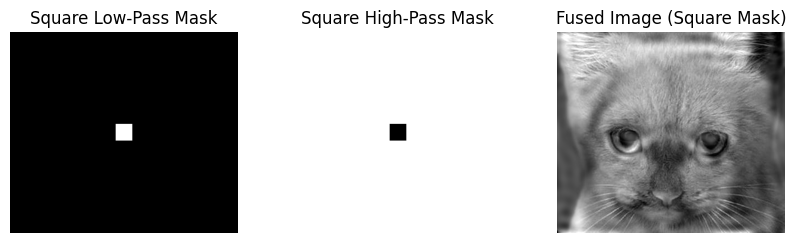

In [ ]:
# Shifted FFT of both images
F_cat = np.fft.fftshift(np.fft.fft2(cat_array))
F_dog = np.fft.fftshift(np.fft.fft2(dog_array))

rows, cols = cat_array.shape
crow, ccol = rows//2, cols//2

# Square mask
size =15
low_pass = np.zeros((rows, cols))
low_pass[crow-size:crow+size, ccol-size:ccol+size] = 1
high_pass = 1 - low_pass

# Applying masks
low_freq = F_dog * low_pass
high_freq = F_cat * high_pass

#Fused image
fused_freq = low_freq + high_freq

# Inverse FFT
fused_img = np.fft.ifft2(np.fft.ifftshift(fused_freq))
fused_img = np.abs(fused_img)
fused_img = np.clip(fused_img, 0, 255).astype(np.uint8)

#Plotting the filters and the fused image
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(low_pass, cmap='gray')
plt.title("Square Low-Pass Mask")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(high_pass, cmap='gray')
plt.title("Square High-Pass Mask")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(fused_img, cmap='gray')
plt.title("Fused Image (Square Mask)")
plt.axis('off')
plt.show()


## Circular Mask Frequency Mixer (Rejected)

I used a circular mask to separate frequencies. This improved over the square mask but still caused some ringing and did not yield a clean fusion.

- **Formula**: Circular mask in the frequency domain:
  
  $H_{\text{low}}(u, v) =
  \begin{cases}
  1, & \text{if } \sqrt{\left(u - \frac{M}{2}\right)^2 + \left(v - \frac{N}{2}\right)^2} \leq r \\
  0, & \text{otherwise}
  \end{cases} $
  
  
  $H_{\text{high}}(u, v) = 1 - H_{\text{low}}(u, v)$
  
  where $r = 30$ pixels.

This is Similar to square filters but uses a circular boundary for smoother transitions

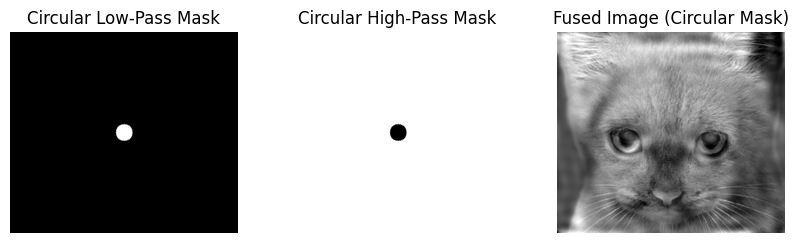

In [ ]:
# Circular mask
Y, X = np.ogrid[:rows, :cols]
radius = 15
dist_from_center = (X - ccol)**2 + (Y - crow)**2
circ_mask = np.zeros((rows, cols))
circ_mask[dist_from_center <= radius**2] = 1
circ_high_pass = 1 - circ_mask

# Apply circular masks
low_freq_circ = F_dog * circ_mask
high_freq_circ = F_cat * circ_high_pass

#Fused image
fused_freq_circ = low_freq_circ + high_freq_circ

# Inverse FFT
fused_img_circ = np.fft.ifft2(np.fft.ifftshift(fused_freq_circ))
fused_img_circ = np.abs(fused_img_circ)
fused_img_circ = np.clip(fused_img_circ, 0, 255).astype(np.uint8)

#Plotting the filters and the fused image
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(circ_mask, cmap='gray')
plt.title("Circular Low-Pass Mask")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(circ_high_pass, cmap='gray')
plt.title("Circular High-Pass Mask")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(fused_img_circ, cmap='gray')
plt.title("Fused Image (Circular Mask)")
plt.axis('off')
plt.show()


## Bilateral Filter Frequency Mixer (Rejected)

I used a bilateral filter to extract low frequencies (structure) and subtracting a blurred version to get high frequencies (details). Fusion was unstable and did not generalize well.

- **Formula**: Spatial domain filter:
  
  $I_{\text{low}}(x, y) = \frac{1}{W} \sum_{p \in S} I(p) \exp\left(-\frac{\|p - (x, y)\|^2}{2 \sigma_s^2}\right) \exp\left(-\frac{\|I(p) - I(x, y)\|^2}{2 \sigma_c^2}\right)$
  
  $I_{\text{high}}(x, y) = I(x, y) - I_{\text{low}}(x, y)$
  
  where $\sigma_s = 5$, $\sigma_c = 0.15$, $W$ is a normalization factor.

**Logic**: Preserves edges while smoothing , but did not generate best results.



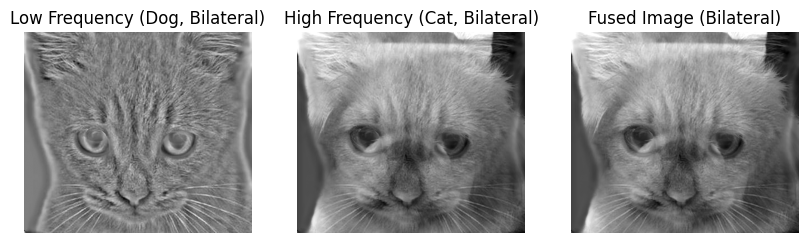

In [ ]:
from skimage.restoration import denoise_bilateral

# Low frequencies from dog using bilateral filter
low_freq_dog = denoise_bilateral(dog_array, sigma_color=0.15, sigma_spatial=5, channel_axis=None)
low_freq_dog = (low_freq_dog * 255).astype(np.uint8)

# High frequencies from cat
cat_blur = denoise_bilateral(cat_array, sigma_color=0.15, sigma_spatial=5, channel_axis=None)
cat_blur = (cat_blur * 255).astype(np.uint8)
high_freq_cat = cat_array.astype(np.float32) - cat_blur.astype(np.float32)

# Fuse
fused_img_bilat = low_freq_dog.astype(np.float32) + high_freq_cat
fused_img_bilat = np.clip(fused_img_bilat, 0, 255).astype(np.uint8)


#Plotting the filters and the fused image
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(high_freq_cat, cmap='gray')
plt.title("Low Frequency (Dog, Bilateral)")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(fused_img_bilat, cmap='gray')
plt.title("High Frequency (Cat, Bilateral)")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(fused_img_bilat, cmap='gray')
plt.title("Fused Image (Bilateral)")
plt.axis('off')
plt.show()


## Gaussian Filter Frequency Mixer (Final Approach)

A Gaussian mask was used for smooth frequency separation, avoiding ringing artifacts and producing a clean hybrid image.

- **Formula**: Spatial domain Gaussian kernel:
  
  $G(x, y) = \frac{1}{\sum G} \exp\left(-\frac{x^2 + y^2}{2 \sigma^2}\right)$
  
- **Logic**: Convolve the dog image with a Gaussian kernel for low frequencies. Subtract a blurred cat image from the original for high frequencies. Sum the results.
- **Reasoning**: Smooth kernel avoids artifacts, providing natural transitions. Tuned $\sigma$ values balance structure and detail.
- **Outcome**: Produces a visually coherent fused image.

## Fusion Logic

The frequency mixer combines low frequencies (overall structure) from the dog image with high frequencies (fine details) from the cat image. Low frequencies are extracted by blurring (low-pass filtering), and high frequencies are obtained by subtracting the blurred image from the original (high-pass filtering). The fused image is:

$I_{\text{fused}}$ = $I_{\text{dog, low}}$ + $I_{\text{cat,
high}}$

where $I_{\text{dog, low}}$ is the low-pass filtered dog image, and $I_{\text{cat, high}} = I_{\text{cat}} - I_{\text{cat, low}}$.

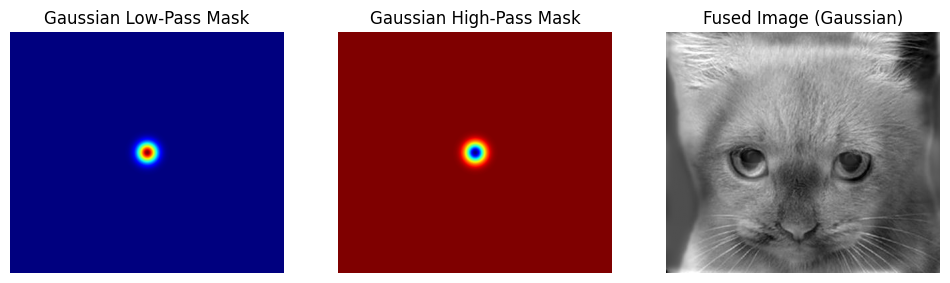

In [ ]:
# Create Gaussian masks
sigma = 10
Y, X = np.ogrid[:rows, :cols]
D2 = (X - ccol)**2 + (Y - crow)**2
gauss_lp = np.exp(-D2 / (2 * sigma**2))
gauss_hp = 1 - gauss_lp

# Apply Gaussian masks
low_freq_gauss = F_dog * gauss_lp
high_freq_gauss = F_cat * gauss_hp
fused_freq_gauss = low_freq_gauss + high_freq_gauss

fused_img_gauss = np.fft.ifft2(np.fft.ifftshift(fused_freq_gauss))
fused_img_gauss = np.abs(fused_img_gauss)
fused_img_gauss = np.clip(fused_img_gauss, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.imshow(gauss_lp, cmap='jet')
plt.title("Gaussian Low-Pass Mask")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gauss_hp, cmap='jet')
plt.title("Gaussian High-Pass Mask")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(fused_img_gauss, cmap='gray')
plt.title("Fused Image (Gaussian)")
plt.axis('off')
plt.show()


## Observations

- **Square and circular masks** cause visible ringing traces due to sharp frequency cut-offs.
- **Bilateral filtering** preserves edges but is sensitive to parameters.
- **Gaussian filtering** provides smooth transitions between frequencies, producing a clean hybrid image.


## Conclusion

The Gaussian filter achieved the best fusion, combining the dog's structure with the cat's details without artifacts. Unsuccessful approaches highlighted the importance of smooth frequency transitions.